Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   fraud_status     600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [5]:
fraud.shape

(600, 7)

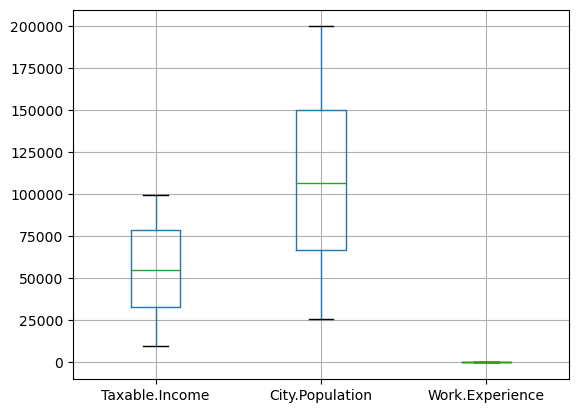

In [6]:
fraud.boxplot()
plt.show()

<Figure size 1000x500 with 0 Axes>

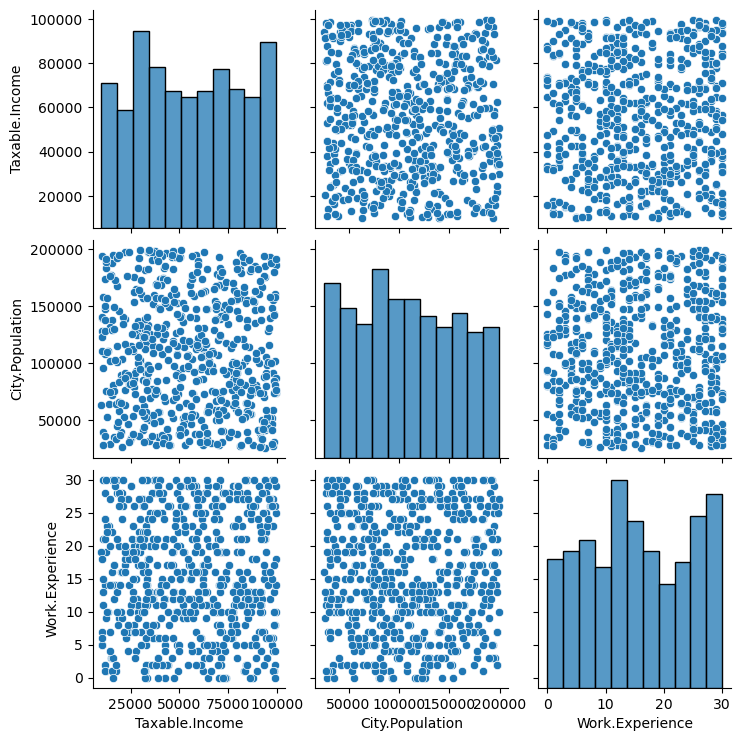

In [7]:
plt.figure(figsize=(10,5))
sns.pairplot(fraud)
plt.show()

In [8]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
fraud[fraud.duplicated()].shape

(0, 7)

In [10]:
fraud = fraud.rename(columns={'Marital.Status':'Marital',
                             'Taxable.Income':'TaxableIncome',
                             'City.Population':'Population',
                             'Work.Experience':'Experience'})

In [11]:
fraud['TaxableIncome'] = pd.cut(fraud['TaxableIncome'], bins=[0,30000,99619], labels=('Risky','Good'))

In [12]:
label_encoder = LabelEncoder()
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud['TaxableIncome'] = label_encoder.fit_transform(fraud['TaxableIncome'])

In [13]:
fraud['Marital'] = fraud['Marital'].map({'Single':1, 'Divorced':2, 'Married':3})

In [14]:
fraud

,Undergrad,Marital,TaxableIncome,Population,Experience,Urban,fraud_status
0,0,1,0,50047,10,1,good
1,1,2,0,134075,18,1,good
2,0,3,0,160205,30,1,good
3,1,1,0,193264,15,1,good
4,0,3,0,27533,28,0,good
...,...,...,...,...,...,...,...
595,1,2,0,39492,7,1,good
596,1,2,0,55369,2,1,good
597,0,2,0,154058,0,1,good
598,1,3,0,180083,17,0,good


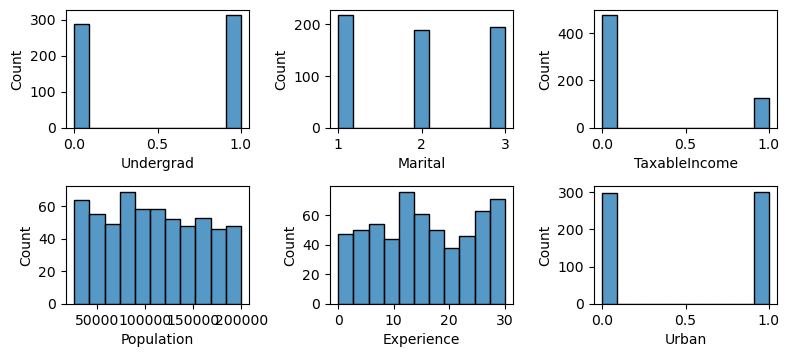

In [47]:
import matplotlib.pyplot as plt
c=3
r=3
col=fraud.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(8,5))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=fraud[co],ax=axis)
size.tight_layout()
plt.show()

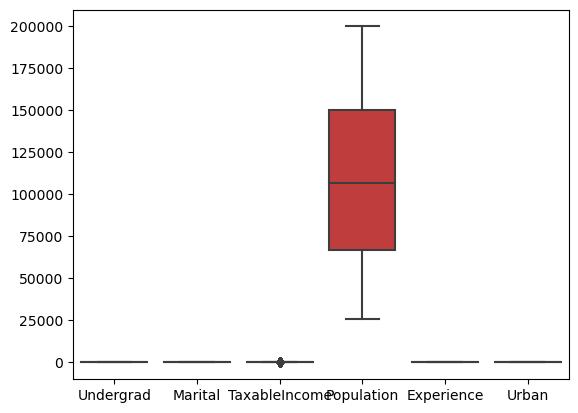

In [15]:
sns.boxplot(data=fraud)
plt.show()

In [18]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [19]:
fr_norm = norm_func(fraud.iloc[:,[0,1,2,3,4,5]])
fr_norm

,Undergrad,Marital,TaxableIncome,Population,Experience,Urban
0,0.0,0.0,0.0,0.139472,0.333333,1.0
1,1.0,0.5,0.0,0.622394,0.600000,1.0
2,0.0,1.0,0.0,0.772568,1.000000,1.0
3,1.0,0.0,0.0,0.962563,0.500000,1.0
4,0.0,1.0,0.0,0.010081,0.933333,0.0
...,...,...,...,...,...,...
595,1.0,0.5,0.0,0.078811,0.233333,1.0
596,1.0,0.5,0.0,0.170058,0.066667,1.0
597,0.0,0.5,0.0,0.737240,0.000000,1.0
598,1.0,1.0,0.0,0.886810,0.566667,0.0


In [20]:
X = fr_norm.iloc[:,[0,1,3,4,5]]
Y = fr_norm['TaxableIncome']

In [21]:
X

,Undergrad,Marital,Population,Experience,Urban
0,0.0,0.0,0.139472,0.333333,1.0
1,1.0,0.5,0.622394,0.600000,1.0
2,0.0,1.0,0.772568,1.000000,1.0
3,1.0,0.0,0.962563,0.500000,1.0
4,0.0,1.0,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.5,0.078811,0.233333,1.0
596,1.0,0.5,0.170058,0.066667,1.0
597,0.0,0.5,0.737240,0.000000,1.0
598,1.0,1.0,0.886810,0.566667,0.0


In [22]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: TaxableIncome, Length: 600, dtype: float64

In [23]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=0)
results = cross_val_score(model, X, Y, cv=kfold)
results*100

array([76.66666667, 76.66666667, 65.        , 73.33333333, 80.        ,
       63.33333333, 86.66666667, 71.66666667, 76.66666667, 81.66666667])

In [24]:
print(results.mean()*100)

75.16666666666667


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [26]:
model01 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model01.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [27]:
y_pred = model01.predict(x_test)

In [28]:
pd.crosstab(y_pred,y_test)

TaxableIncome,0.0,1.0
row_0,,
0.0,137,43


In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test)*100)

76.11111111111111


### Finding best parameter using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
grid_param = {'max_depth':[10,20,30],
              'n_estimators':[100,200,300]}

In [31]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_param, cv=5)

In [32]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [33]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'n_estimators': 300}
0.780952380952381


In [38]:
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
best_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [39]:
y_pred_best = best_model.predict(x_test)

In [40]:
y_pred_best

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
pd.crosstab(y_pred_best, y_test)

TaxableIncome,0.0,1.0
row_0,,
0.0,132,40
1.0,5,3


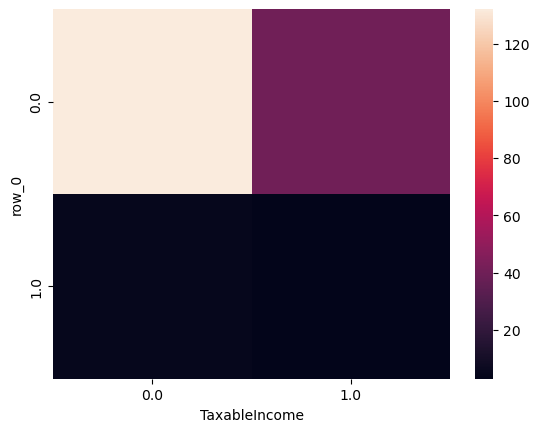

In [46]:
sns.heatmap(pd.crosstab(y_pred_best, y_test));
plt.show()

In [42]:
print(accuracy_score(y_pred_best, y_test))

0.75


In [43]:
np.mean(y_pred_best==y_test)

0.75